In [1]:
import pickle

from haloflow.npe import plotting
# from haloflow.npe import valid as V

In [8]:
import torch
cuda = torch.cuda.is_available()
device = ("cuda:0" if cuda else "cpu")

In [2]:
sims = ['TNG50', 'TNG100', 'TNG_ALL', 'Eagle100', 'Simba100']
obs = 'mags_morph'
version = 1
all_alpha = []
all_ecp = []
all_labels = []

In [16]:
for sim in sims:
    ranks, alpha, ecp = V.validate_npe(train_obs=obs, train_sim=sim, 
                                   test_obs=obs, test_sim=sim, 
                                   version=version, device=device)
    all_alpha.append(alpha)
    all_ecp.append(ecp)

1158 models trained
[848, 408, 129, 562, 150]


/groups/chhahn/haloflow/src/haloflow/util.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  qphi = torch.load(fqphi, map_location=device)


826 models trained
[124, 762, 699, 132, 590]
428 models trained
[235, 214, 259, 198, 153]
1000 models trained
[706, 410, 492, 665, 725]
993 models trained
[942, 891, 481, 477, 664]


In [ ]:
# save alpha and ecp
with open(f'alpha_{obs}_{version}.pkl', 'wb') as f:
    pickle.dump(all_alpha, f)

with open(f'ecp_{obs}_{version}.pkl', 'wb') as f:
    pickle.dump(all_ecp, f)

In [3]:
with open('alpha_mags_1.pkl', 'rb') as f:
	alphas_mags = pickle.load(f)

with open('ecp_mags_1.pkl', 'rb') as f:
	ecps_mags = pickle.load(f)

with open('alpha_mags_morph_1.pkl', 'rb') as f:
	alphas_morph = pickle.load(f)

with open('ecp_mags_morph_1.pkl', 'rb') as f:
	ecps_morph = pickle.load(f)

In [4]:
labels = ['TNG 50', 'TNG 100', 'TNG ALL', 'Eagle 100', 'Simba 100']

No handles with labels found to put in legend.


<Figure size 1200x600 with 0 Axes>

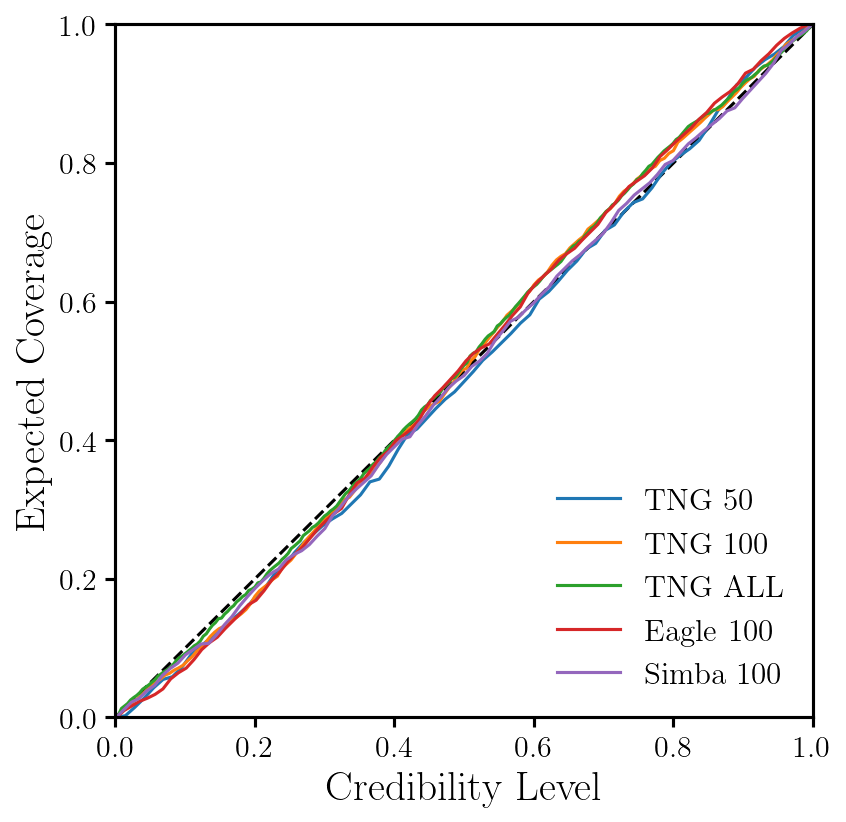

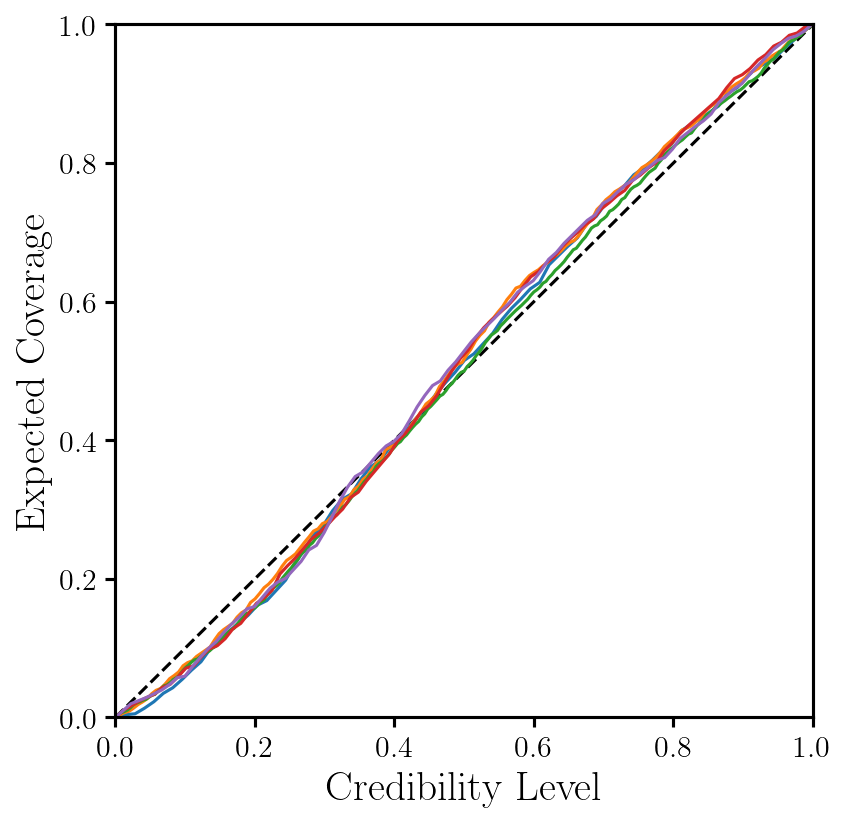

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))

fig2, ax2 = plotting.plot_coverage(alphas_mags, ecps_mags, labels)
fig3, ax3 = plotting.plot_coverage(alphas_morph, ecps_morph, [None]*len(labels))

No handles with labels found to put in legend.


Text(0.5, 1.0, '$X_{\\rm{mags}}, X_{\\rm{morph}}$')

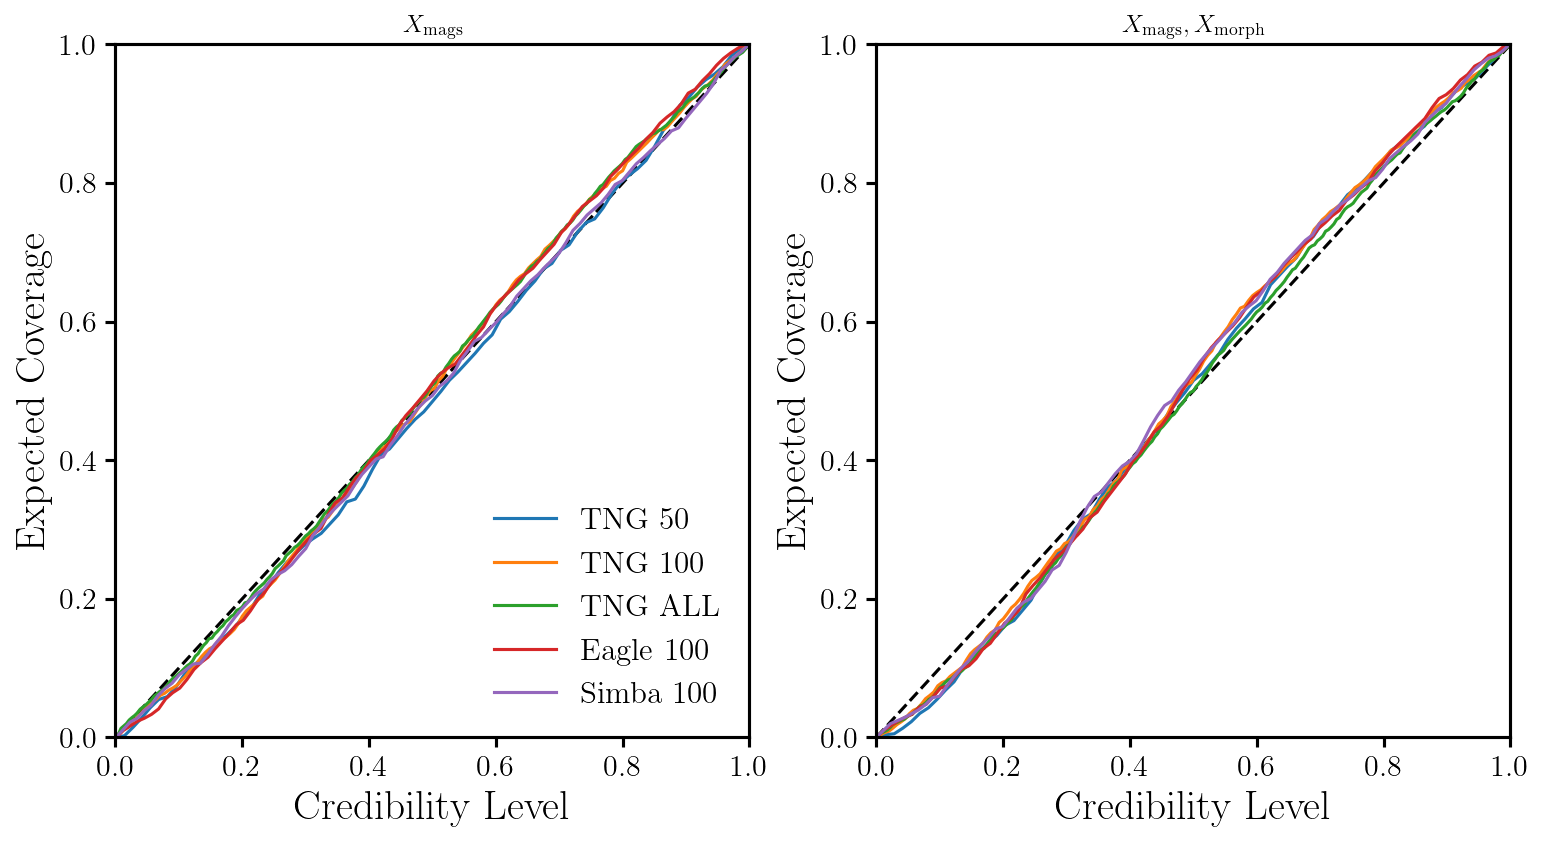

In [12]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(12, 6), dpi=150)

# plot the coverage on the new axes
plotting.plot_coverage(alphas_mags, ecps_mags, labels, ax=ax2)
plotting.plot_coverage(alphas_morph, ecps_morph, [None]*len(labels), ax=ax3)

ax2.set_title(r'$X_{\rm{mags}}$')
ax3.set_title(r'$X_{\rm{mags}}, X_{\rm{morph}}$')